<center> <font color = #82318E size = 5 face = "微软雅黑" > Shallow Water Equations in Spherical Geometry の Damo </font> </center>

<center> <font color = #82318E size = 4 face = "微软雅黑" > 3.2 Global Steady State Nonlinear Zonal Geotrophic Flow (P12/29) </font> </center>

In [1]:
import math 
import numpy as np
import scipy as sc
import scipy.misc

In [2]:
def part_deri(func, var = 0, point = list()): 
    args = point[::]
    def wraps(x): 
        args[var] = x         
        return func(*args)   
    return scipy.misc.derivative(wraps, point[var], dx = 1e-8)

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.1 Initialization </font> </center>

In [3]:
'''
Define basic variables:
lam <- /lambda
the <- /theta
alp <- /alpha

Define basic constants
ome <- /omega
u_0 <- basic velocity

a   <- earth radius
g   <- gravity
h_0 <- initial height 
Last three is useless, from my perspective.
'''
a = 6371e3
g = 9.78
h_0 = 1e3
ome = (2 * math.pi) / (24 * 60 * 60)
u_0 = (2 * math.pi * a) / (12 * (24 * 60 * 60))

lam = math.pi / 4
the = math.pi / 4
alp = math.pi / 4

def u(lam, the, alp):
    global u_0
    temp = u_0 * (math.cos(lam) * math.sin(the) * math.sin(alp)
                  + math.cos(the) * math.cos(alp))
    return temp

def v(lam, the, alp):
    global u_0
    temp = - u_0 * math.sin(lam) * math.sin(alp)
    return temp

def gh(lam, the, alp):
    global a, g, h_0, u_0
    temp = g * h_0 - (a * ome * u_0 + u_0 ** 2 / 2) * (
           - math.cos(lam) * math.cos(the) * math.sin(alp) 
           + math.sin(the) * math.cos(alp)) ** 2
    return temp

def f(lam, the, alp):
    global ome
    temp = 2 * ome * (- math.cos(lam) * math.cos(the) * math.sin(alp)
                      + math.sin(the) * math.cos(alp))
    return temp

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.2 Equation One </font> </center>

In [4]:
def eq1(lam, the, alp):
    global a
    temp = 1 / (a * math.cos(the)) * u(lam, the, alp) * part_deri(u, 0, [lam, the, alp])
    temp += 1 / a * v(lam, the, alp) * part_deri(u, 1, [lam, the, alp])
    temp += - (f(lam, the, alp) + u(lam, the, alp) / a * math.tan(the)) * v(lam, the, alp)
    temp += 1 / (a * math.cos(the)) * part_deri(gh, 0, [lam, the, alp])
    
    return temp

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.3 Numerical Evidence </font> </center>

In [5]:
skip = 9
for lam in np.linspace(start = 0, stop = 2 * math.pi, num = 360//skip, endpoint = False):
    for the in np.linspace(start = - math.pi/2+1e-6, stop = math.pi/2-1e-6, num = 180//skip + 1, endpoint = True):
        for alp in np.linspace(start = 0, stop = math.pi/2, num = 90//skip + 1, endpoint = True):
            print('lam:{0:.2f}  the:{1:0>5.2f}  alp:{2:0>5.2f}  equatin one:{3:.8f}'.format(
                   lam/math.pi * 180, the/math.pi * 180, alp/math.pi * 180, eq1(lam, the, alp)))

lam:0.00  the:-90.00  alp:00.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:09.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:18.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:27.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:36.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:45.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:54.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:63.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:72.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:81.00  equatin one:0.00000000
lam:0.00  the:-90.00  alp:90.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:00.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:09.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:18.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:27.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:36.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:45.00  equatin one:0.00000000
lam:0.00  the:-81.00  alp:54.00  equatin one:0.0

lam:9.00  the:27.00  alp:36.00  equatin one:-0.00000000
lam:9.00  the:27.00  alp:45.00  equatin one:-0.00000000
lam:9.00  the:27.00  alp:54.00  equatin one:-0.00000000
lam:9.00  the:27.00  alp:63.00  equatin one:0.00000000
lam:9.00  the:27.00  alp:72.00  equatin one:-0.00000000
lam:9.00  the:27.00  alp:81.00  equatin one:-0.00000000
lam:9.00  the:27.00  alp:90.00  equatin one:-0.00000000
lam:9.00  the:36.00  alp:00.00  equatin one:0.00000000
lam:9.00  the:36.00  alp:09.00  equatin one:-0.00000000
lam:9.00  the:36.00  alp:18.00  equatin one:0.00000000
lam:9.00  the:36.00  alp:27.00  equatin one:0.00000000
lam:9.00  the:36.00  alp:36.00  equatin one:-0.00000000
lam:9.00  the:36.00  alp:45.00  equatin one:-0.00000000
lam:9.00  the:36.00  alp:54.00  equatin one:-0.00000000
lam:9.00  the:36.00  alp:63.00  equatin one:0.00000000
lam:9.00  the:36.00  alp:72.00  equatin one:-0.00000000
lam:9.00  the:36.00  alp:81.00  equatin one:0.00000000
lam:9.00  the:36.00  alp:90.00  equatin one:0.00000000

lam:27.00  the:63.00  alp:90.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:00.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:09.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:18.00  equatin one:-0.00000000
lam:27.00  the:72.00  alp:27.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:36.00  equatin one:-0.00000000
lam:27.00  the:72.00  alp:45.00  equatin one:-0.00000000
lam:27.00  the:72.00  alp:54.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:63.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:72.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:81.00  equatin one:0.00000000
lam:27.00  the:72.00  alp:90.00  equatin one:0.00000000
lam:27.00  the:81.00  alp:00.00  equatin one:0.00000000
lam:27.00  the:81.00  alp:09.00  equatin one:-0.00000000
lam:27.00  the:81.00  alp:18.00  equatin one:0.00000000
lam:27.00  the:81.00  alp:27.00  equatin one:-0.00000000
lam:27.00  the:81.00  alp:36.00  equatin one:-0.00000000
lam:27.00  the:81.00  alp:45.00  equatin o

lam:54.00  the:-90.00  alp:45.00  equatin one:0.00000325
lam:54.00  the:-90.00  alp:54.00  equatin one:0.00000501
lam:54.00  the:-90.00  alp:63.00  equatin one:-0.00001561
lam:54.00  the:-90.00  alp:72.00  equatin one:0.00000768
lam:54.00  the:-90.00  alp:81.00  equatin one:0.00001012
lam:54.00  the:-90.00  alp:90.00  equatin one:-0.00000080
lam:54.00  the:-81.00  alp:00.00  equatin one:0.00000000
lam:54.00  the:-81.00  alp:09.00  equatin one:0.00000000
lam:54.00  the:-81.00  alp:18.00  equatin one:-0.00000000
lam:54.00  the:-81.00  alp:27.00  equatin one:0.00000000
lam:54.00  the:-81.00  alp:36.00  equatin one:-0.00000000
lam:54.00  the:-81.00  alp:45.00  equatin one:0.00000000
lam:54.00  the:-81.00  alp:54.00  equatin one:-0.00000000
lam:54.00  the:-81.00  alp:63.00  equatin one:-0.00000000
lam:54.00  the:-81.00  alp:72.00  equatin one:-0.00000000
lam:54.00  the:-81.00  alp:81.00  equatin one:-0.00000000
lam:54.00  the:-81.00  alp:90.00  equatin one:-0.00000000
lam:54.00  the:-72.00 

lam:72.00  the:27.00  alp:72.00  equatin one:0.00000000
lam:72.00  the:27.00  alp:81.00  equatin one:-0.00000000
lam:72.00  the:27.00  alp:90.00  equatin one:-0.00000000
lam:72.00  the:36.00  alp:00.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:09.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:18.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:27.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:36.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:45.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:54.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:63.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:72.00  equatin one:-0.00000000
lam:72.00  the:36.00  alp:81.00  equatin one:0.00000000
lam:72.00  the:36.00  alp:90.00  equatin one:-0.00000000
lam:72.00  the:45.00  alp:00.00  equatin one:0.00000000
lam:72.00  the:45.00  alp:09.00  equatin one:-0.00000000
lam:72.00  the:45.00  alp:18.00  equatin one:-0.00000000
lam:72.00  the:45.00  alp:27.00  equatin o

lam:99.00  the:63.00  alp:18.00  equatin one:0.00000000
lam:99.00  the:63.00  alp:27.00  equatin one:0.00000000
lam:99.00  the:63.00  alp:36.00  equatin one:0.00000000
lam:99.00  the:63.00  alp:45.00  equatin one:0.00000000
lam:99.00  the:63.00  alp:54.00  equatin one:-0.00000000
lam:99.00  the:63.00  alp:63.00  equatin one:0.00000000
lam:99.00  the:63.00  alp:72.00  equatin one:0.00000000
lam:99.00  the:63.00  alp:81.00  equatin one:-0.00000000
lam:99.00  the:63.00  alp:90.00  equatin one:-0.00000000
lam:99.00  the:72.00  alp:00.00  equatin one:0.00000000
lam:99.00  the:72.00  alp:09.00  equatin one:0.00000000
lam:99.00  the:72.00  alp:18.00  equatin one:-0.00000000
lam:99.00  the:72.00  alp:27.00  equatin one:-0.00000000
lam:99.00  the:72.00  alp:36.00  equatin one:-0.00000000
lam:99.00  the:72.00  alp:45.00  equatin one:-0.00000000
lam:99.00  the:72.00  alp:54.00  equatin one:0.00000000
lam:99.00  the:72.00  alp:63.00  equatin one:0.00000000
lam:99.00  the:72.00  alp:72.00  equatin 

lam:135.00  the:-0.00  alp:90.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:00.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:09.00  equatin one:-0.00000000
lam:135.00  the:09.00  alp:18.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:27.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:36.00  equatin one:-0.00000000
lam:135.00  the:09.00  alp:45.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:54.00  equatin one:-0.00000000
lam:135.00  the:09.00  alp:63.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:72.00  equatin one:0.00000000
lam:135.00  the:09.00  alp:81.00  equatin one:-0.00000000
lam:135.00  the:09.00  alp:90.00  equatin one:0.00000000
lam:135.00  the:18.00  alp:00.00  equatin one:0.00000000
lam:135.00  the:18.00  alp:09.00  equatin one:0.00000000
lam:135.00  the:18.00  alp:18.00  equatin one:-0.00000000
lam:135.00  the:18.00  alp:27.00  equatin one:0.00000000
lam:135.00  the:18.00  alp:36.00  equatin one:0.00000000
lam:135.00  the:18.00  alp

lam:171.00  the:-90.00  alp:81.00  equatin one:0.00000025
lam:171.00  the:-90.00  alp:90.00  equatin one:0.00000136
lam:171.00  the:-81.00  alp:00.00  equatin one:0.00000000
lam:171.00  the:-81.00  alp:09.00  equatin one:0.00000000
lam:171.00  the:-81.00  alp:18.00  equatin one:0.00000000
lam:171.00  the:-81.00  alp:27.00  equatin one:0.00000000
lam:171.00  the:-81.00  alp:36.00  equatin one:-0.00000000
lam:171.00  the:-81.00  alp:45.00  equatin one:-0.00000000
lam:171.00  the:-81.00  alp:54.00  equatin one:-0.00000000
lam:171.00  the:-81.00  alp:63.00  equatin one:0.00000000
lam:171.00  the:-81.00  alp:72.00  equatin one:-0.00000000
lam:171.00  the:-81.00  alp:81.00  equatin one:-0.00000000
lam:171.00  the:-81.00  alp:90.00  equatin one:-0.00000000
lam:171.00  the:-72.00  alp:00.00  equatin one:0.00000000
lam:171.00  the:-72.00  alp:09.00  equatin one:-0.00000000
lam:171.00  the:-72.00  alp:18.00  equatin one:0.00000000
lam:171.00  the:-72.00  alp:27.00  equatin one:0.00000000
lam:171

lam:198.00  the:-45.00  alp:90.00  equatin one:0.00000000
lam:198.00  the:-36.00  alp:00.00  equatin one:0.00000000
lam:198.00  the:-36.00  alp:09.00  equatin one:-0.00000000
lam:198.00  the:-36.00  alp:18.00  equatin one:-0.00000000
lam:198.00  the:-36.00  alp:27.00  equatin one:-0.00000000
lam:198.00  the:-36.00  alp:36.00  equatin one:-0.00000000
lam:198.00  the:-36.00  alp:45.00  equatin one:0.00000000
lam:198.00  the:-36.00  alp:54.00  equatin one:0.00000000
lam:198.00  the:-36.00  alp:63.00  equatin one:-0.00000000
lam:198.00  the:-36.00  alp:72.00  equatin one:-0.00000000
lam:198.00  the:-36.00  alp:81.00  equatin one:0.00000000
lam:198.00  the:-36.00  alp:90.00  equatin one:-0.00000000
lam:198.00  the:-27.00  alp:00.00  equatin one:0.00000000
lam:198.00  the:-27.00  alp:09.00  equatin one:-0.00000000
lam:198.00  the:-27.00  alp:18.00  equatin one:-0.00000000
lam:198.00  the:-27.00  alp:27.00  equatin one:-0.00000000
lam:198.00  the:-27.00  alp:36.00  equatin one:0.00000000
lam:

lam:225.00  the:27.00  alp:45.00  equatin one:-0.00000000
lam:225.00  the:27.00  alp:54.00  equatin one:-0.00000000
lam:225.00  the:27.00  alp:63.00  equatin one:0.00000000
lam:225.00  the:27.00  alp:72.00  equatin one:-0.00000000
lam:225.00  the:27.00  alp:81.00  equatin one:0.00000000
lam:225.00  the:27.00  alp:90.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:00.00  equatin one:0.00000000
lam:225.00  the:36.00  alp:09.00  equatin one:0.00000000
lam:225.00  the:36.00  alp:18.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:27.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:36.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:45.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:54.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:63.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:72.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:81.00  equatin one:-0.00000000
lam:225.00  the:36.00  alp:90.00  equatin one:-0.00000000
lam:225.00  the:45

lam:252.00  the:-27.00  alp:00.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:09.00  equatin one:-0.00000000
lam:252.00  the:-27.00  alp:18.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:27.00  equatin one:-0.00000000
lam:252.00  the:-27.00  alp:36.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:45.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:54.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:63.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:72.00  equatin one:0.00000000
lam:252.00  the:-27.00  alp:81.00  equatin one:-0.00000000
lam:252.00  the:-27.00  alp:90.00  equatin one:-0.00000000
lam:252.00  the:-18.00  alp:00.00  equatin one:0.00000000
lam:252.00  the:-18.00  alp:09.00  equatin one:0.00000000
lam:252.00  the:-18.00  alp:18.00  equatin one:0.00000000
lam:252.00  the:-18.00  alp:27.00  equatin one:0.00000000
lam:252.00  the:-18.00  alp:36.00  equatin one:0.00000000
lam:252.00  the:-18.00  alp:45.00  equatin one:-0.00000000
lam:252.0

lam:279.00  the:-72.00  alp:90.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:00.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:09.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:18.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:27.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:36.00  equatin one:-0.00000000
lam:279.00  the:-63.00  alp:45.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:54.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:63.00  equatin one:-0.00000000
lam:279.00  the:-63.00  alp:72.00  equatin one:0.00000000
lam:279.00  the:-63.00  alp:81.00  equatin one:-0.00000000
lam:279.00  the:-63.00  alp:90.00  equatin one:-0.00000000
lam:279.00  the:-54.00  alp:00.00  equatin one:0.00000000
lam:279.00  the:-54.00  alp:09.00  equatin one:0.00000000
lam:279.00  the:-54.00  alp:18.00  equatin one:0.00000000
lam:279.00  the:-54.00  alp:27.00  equatin one:0.00000000
lam:279.00  the:-54.00  alp:36.00  equatin one:-0.00000000
lam:279.0

lam:306.00  the:-54.00  alp:81.00  equatin one:0.00000000
lam:306.00  the:-54.00  alp:90.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:00.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:09.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:18.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:27.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:36.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:45.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:54.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:63.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:72.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:81.00  equatin one:0.00000000
lam:306.00  the:-45.00  alp:90.00  equatin one:0.00000000
lam:306.00  the:-36.00  alp:00.00  equatin one:0.00000000
lam:306.00  the:-36.00  alp:09.00  equatin one:-0.00000000
lam:306.00  the:-36.00  alp:18.00  equatin one:0.00000000
lam:306.00  the:-36.00  alp:27.00  equatin one:0.00000000
lam:306.00  t

lam:333.00  the:27.00  alp:36.00  equatin one:0.00000000
lam:333.00  the:27.00  alp:45.00  equatin one:0.00000000
lam:333.00  the:27.00  alp:54.00  equatin one:0.00000000
lam:333.00  the:27.00  alp:63.00  equatin one:0.00000000
lam:333.00  the:27.00  alp:72.00  equatin one:0.00000000
lam:333.00  the:27.00  alp:81.00  equatin one:0.00000000
lam:333.00  the:27.00  alp:90.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:00.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:09.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:18.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:27.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:36.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:45.00  equatin one:-0.00000000
lam:333.00  the:36.00  alp:54.00  equatin one:-0.00000000
lam:333.00  the:36.00  alp:63.00  equatin one:-0.00000000
lam:333.00  the:36.00  alp:72.00  equatin one:-0.00000000
lam:333.00  the:36.00  alp:81.00  equatin one:0.00000000
lam:333.00  the:36.00  alp:

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.5 Full Space </font> </center>

In [6]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

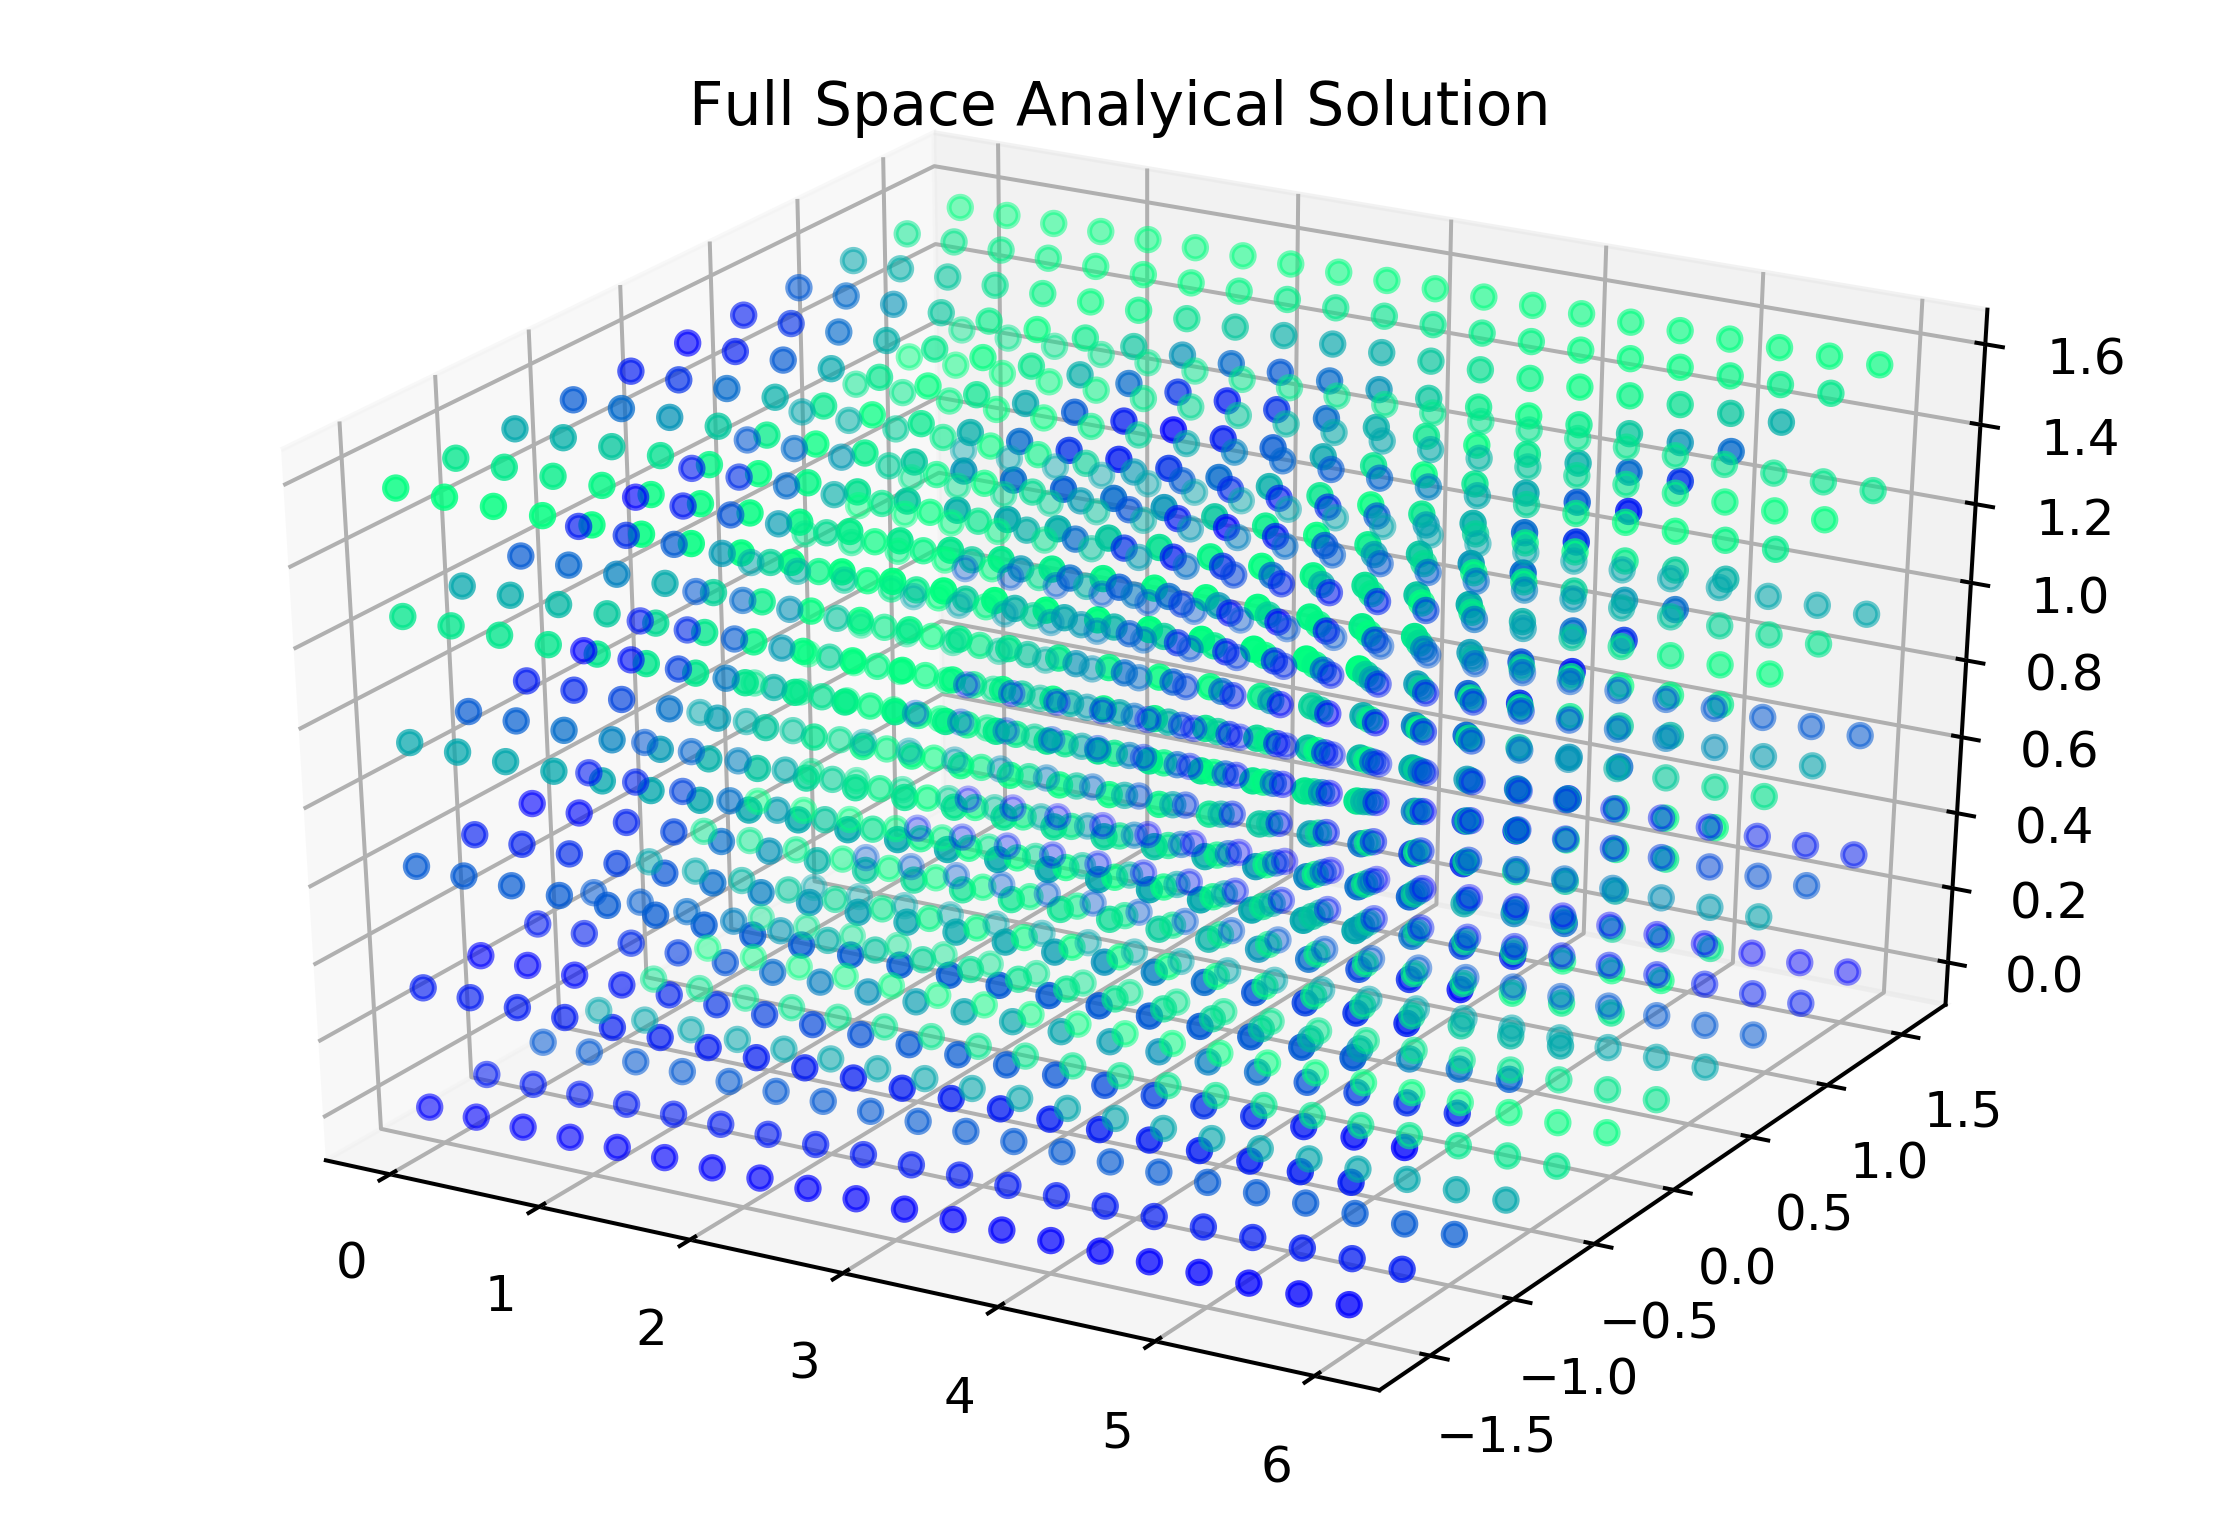

In [8]:
fig = plt.figure(dpi = 360)
ax = axes3d.Axes3D(fig)

skip = 18
X = np.linspace(start = 0, stop = 2 * math.pi, num = 360//skip, endpoint = False)
Y = np.linspace(start = - math.pi/2+1e-6, stop = math.pi/2-1e-6, num = 180//skip + 1, endpoint = True)
Z = np.linspace(start = 0, stop = math.pi/2, num = 90//skip + 1, endpoint = True)
X, Y, Z = np.meshgrid(X, Y, Z)

h = np.zeros(X.shape)
for i in np.arange(X.shape[0]):
    for j in np.arange(X.shape[1]):
        for k in np.arange(X.shape[2]):
            h[i][j][k] = 1 / g * gh(lam = X[i][j][k], the = Y[i][j][k], alp = Z[i][j][k])

ax.scatter(X, Y, Z, c = h, cmap = plt.cm.winter)
ax.set_title('Full Space Analyical Solution')

plt.savefig('./Full Space Analyical Solution.png', dpi = 360)
plt.show()

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.6 Sphere </font> </center>

In [11]:
def Sphere(alp):
    
    fig = plt.figure(dpi = 360)
    ax = axes3d.Axes3D(fig)

    skip = 9
    E = np.linspace(start = 0, stop = 2 * math.pi, num = 360//skip, endpoint = False)
    F = np.linspace(start = - math.pi/2+1e-6, stop = math.pi/2-1e-6, num = 180//skip + 1, endpoint = True)
    E, F = np.meshgrid(E, F)

    X = np.multiply(np.cos(E), np.cos(F))
    Y = np.multiply(np.cos(E), np.sin(F))
    Z = np.sin(E)
    
    h = np.zeros(X.shape)
    for i in np.arange(X.shape[0]):
        for j in np.arange(X.shape[1]):
            h[i][j] = 1 / g * gh(lam = X[i][j], the = Y[i][j], alp = alp)

    ax.scatter(X, Y, Z, c = h, cmap = plt.cm.winter)
    ax.set_title('Sphere Analyical Solution(alpha = {})'.format(alp))
    
    plt.savefig('./Sphere Analyical Solution(alpha = {}).png'.format(alp), dpi = 360)
    plt.show()

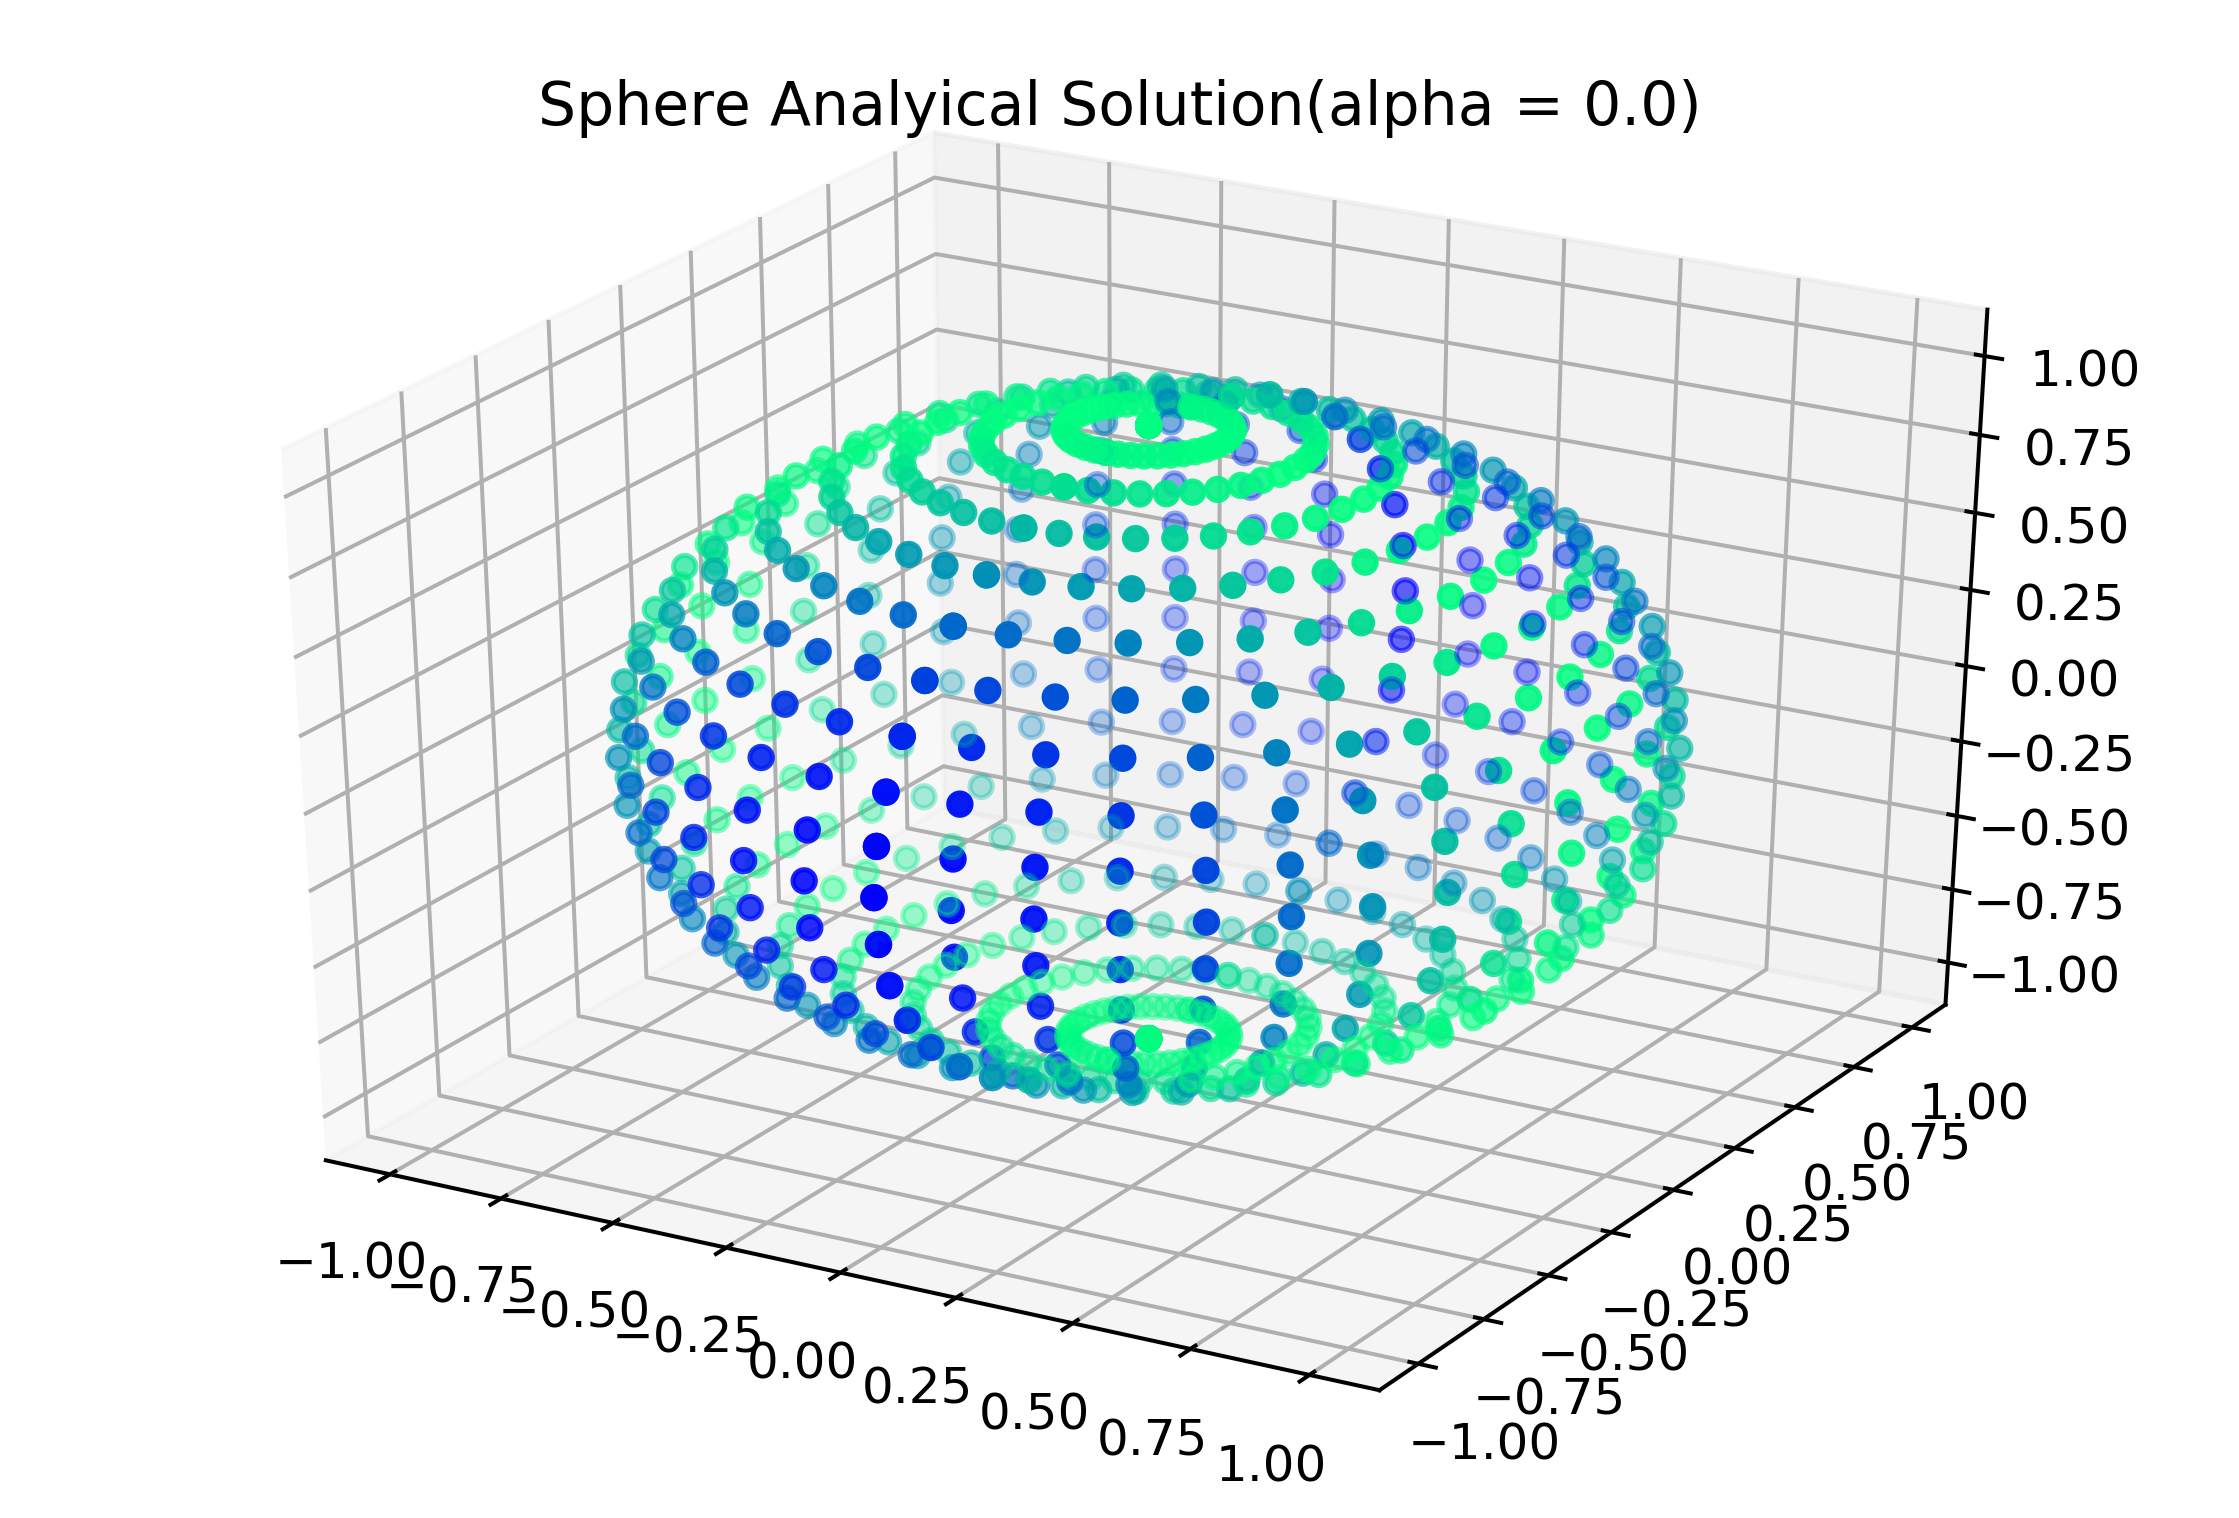

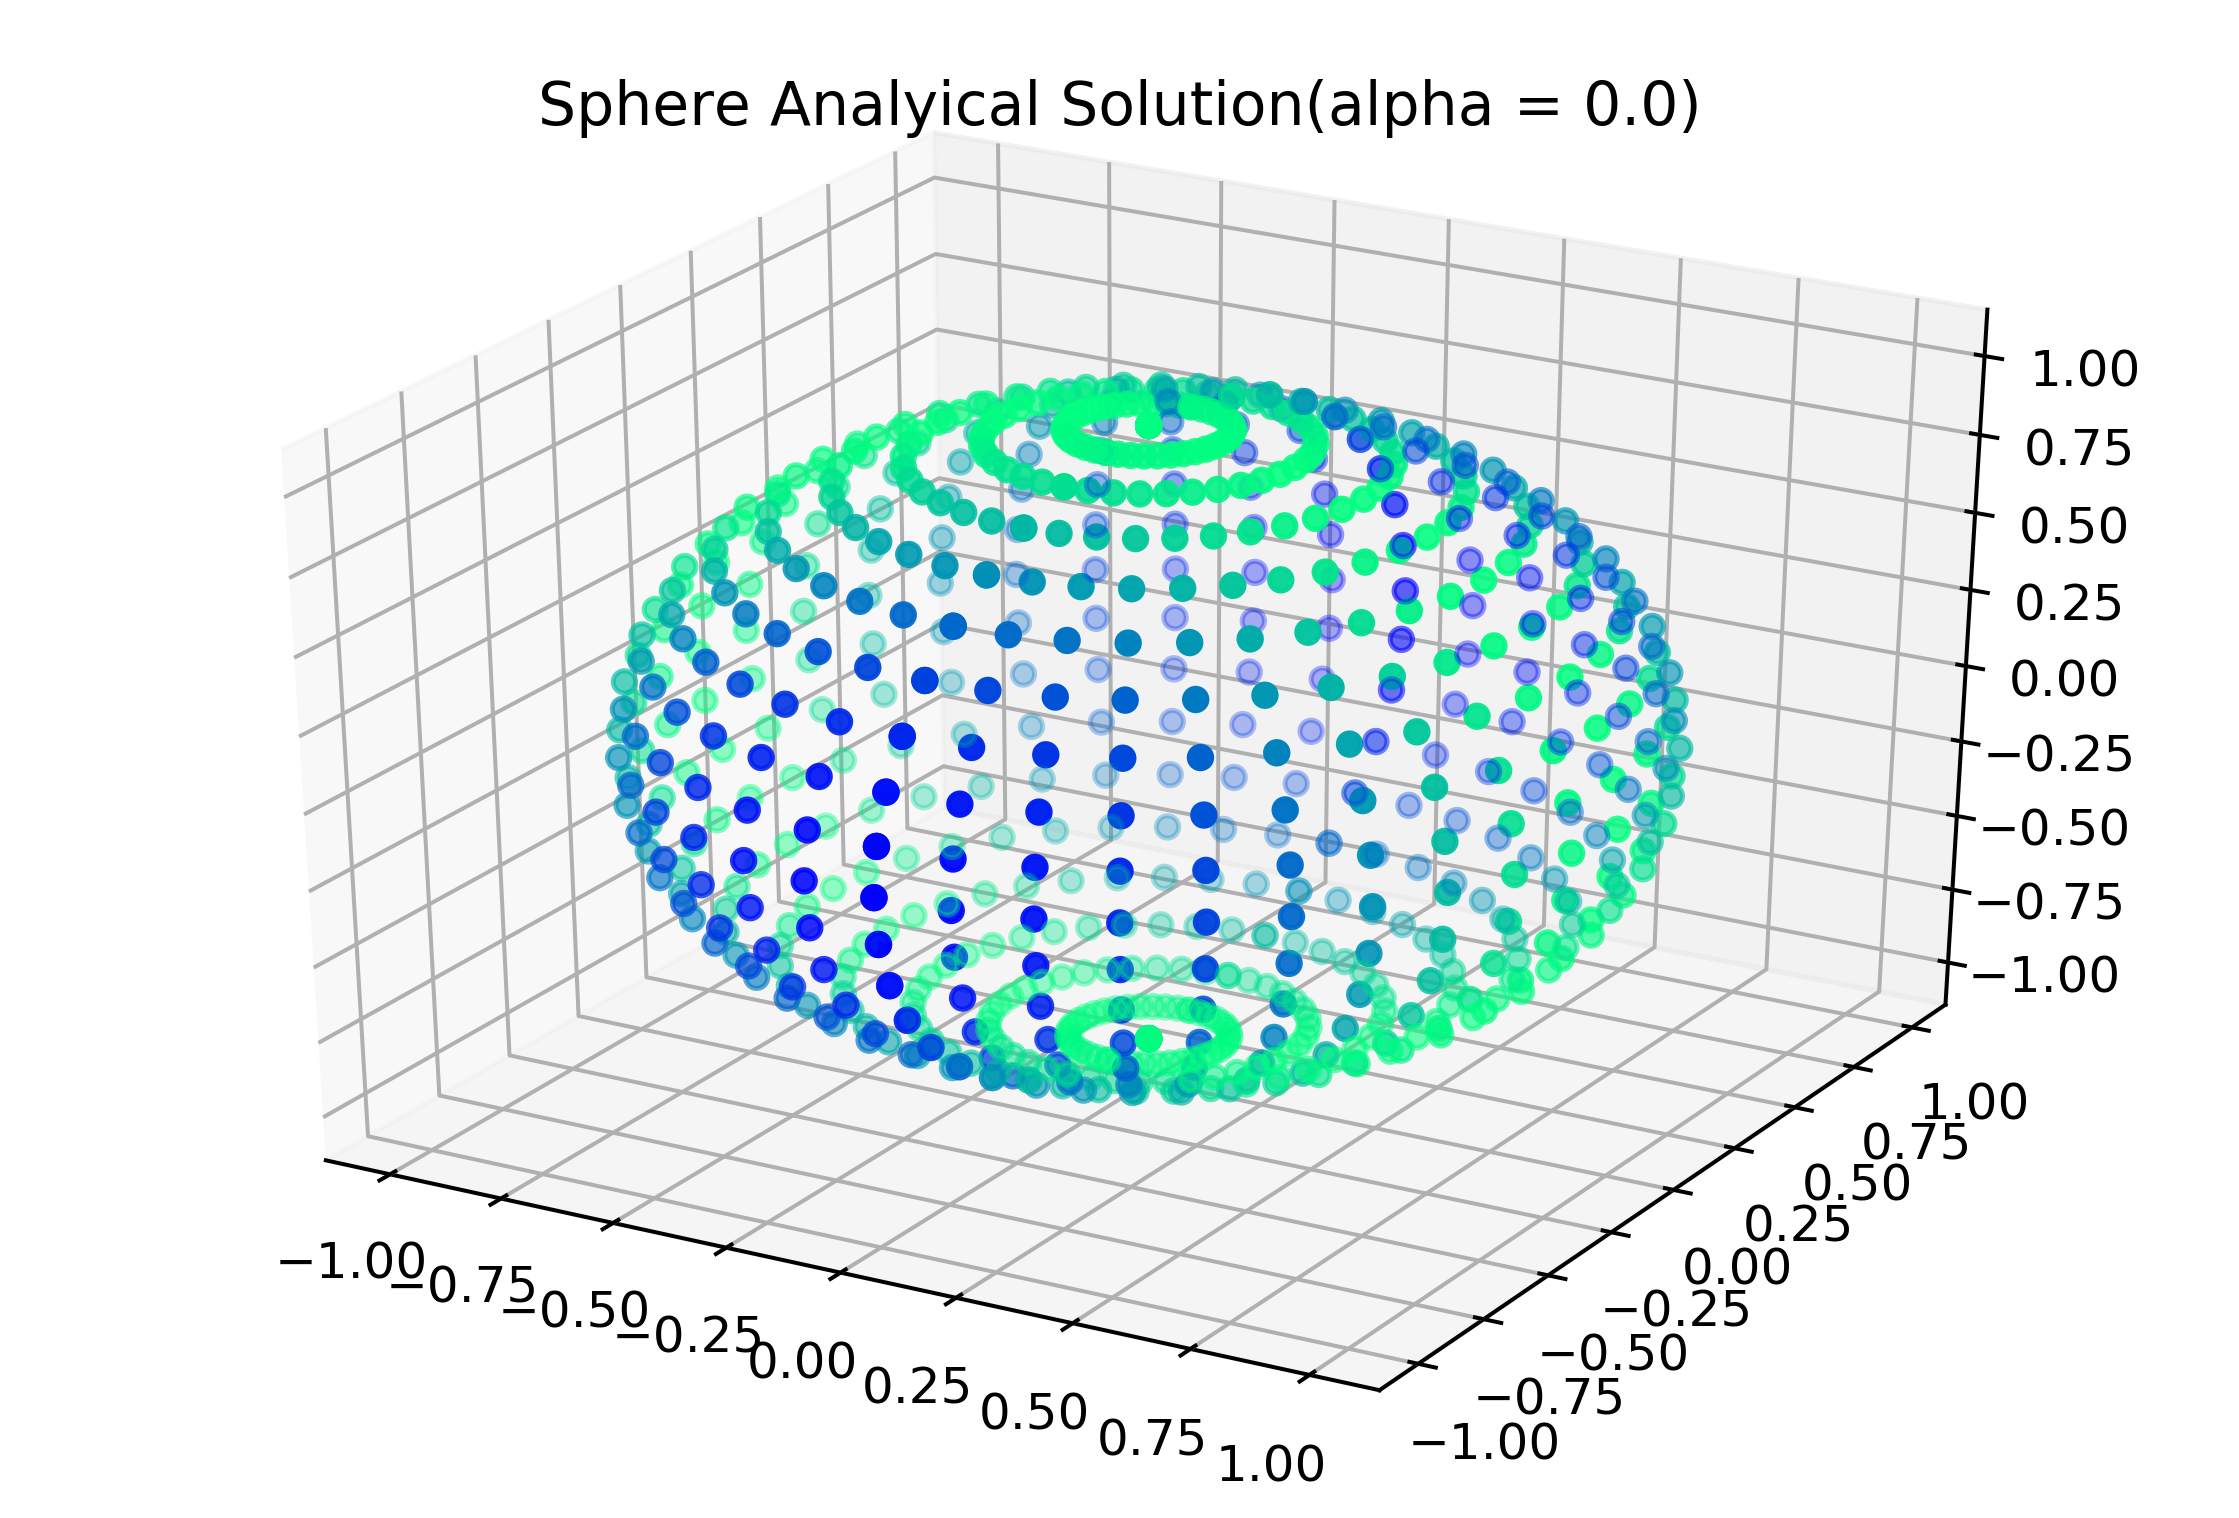

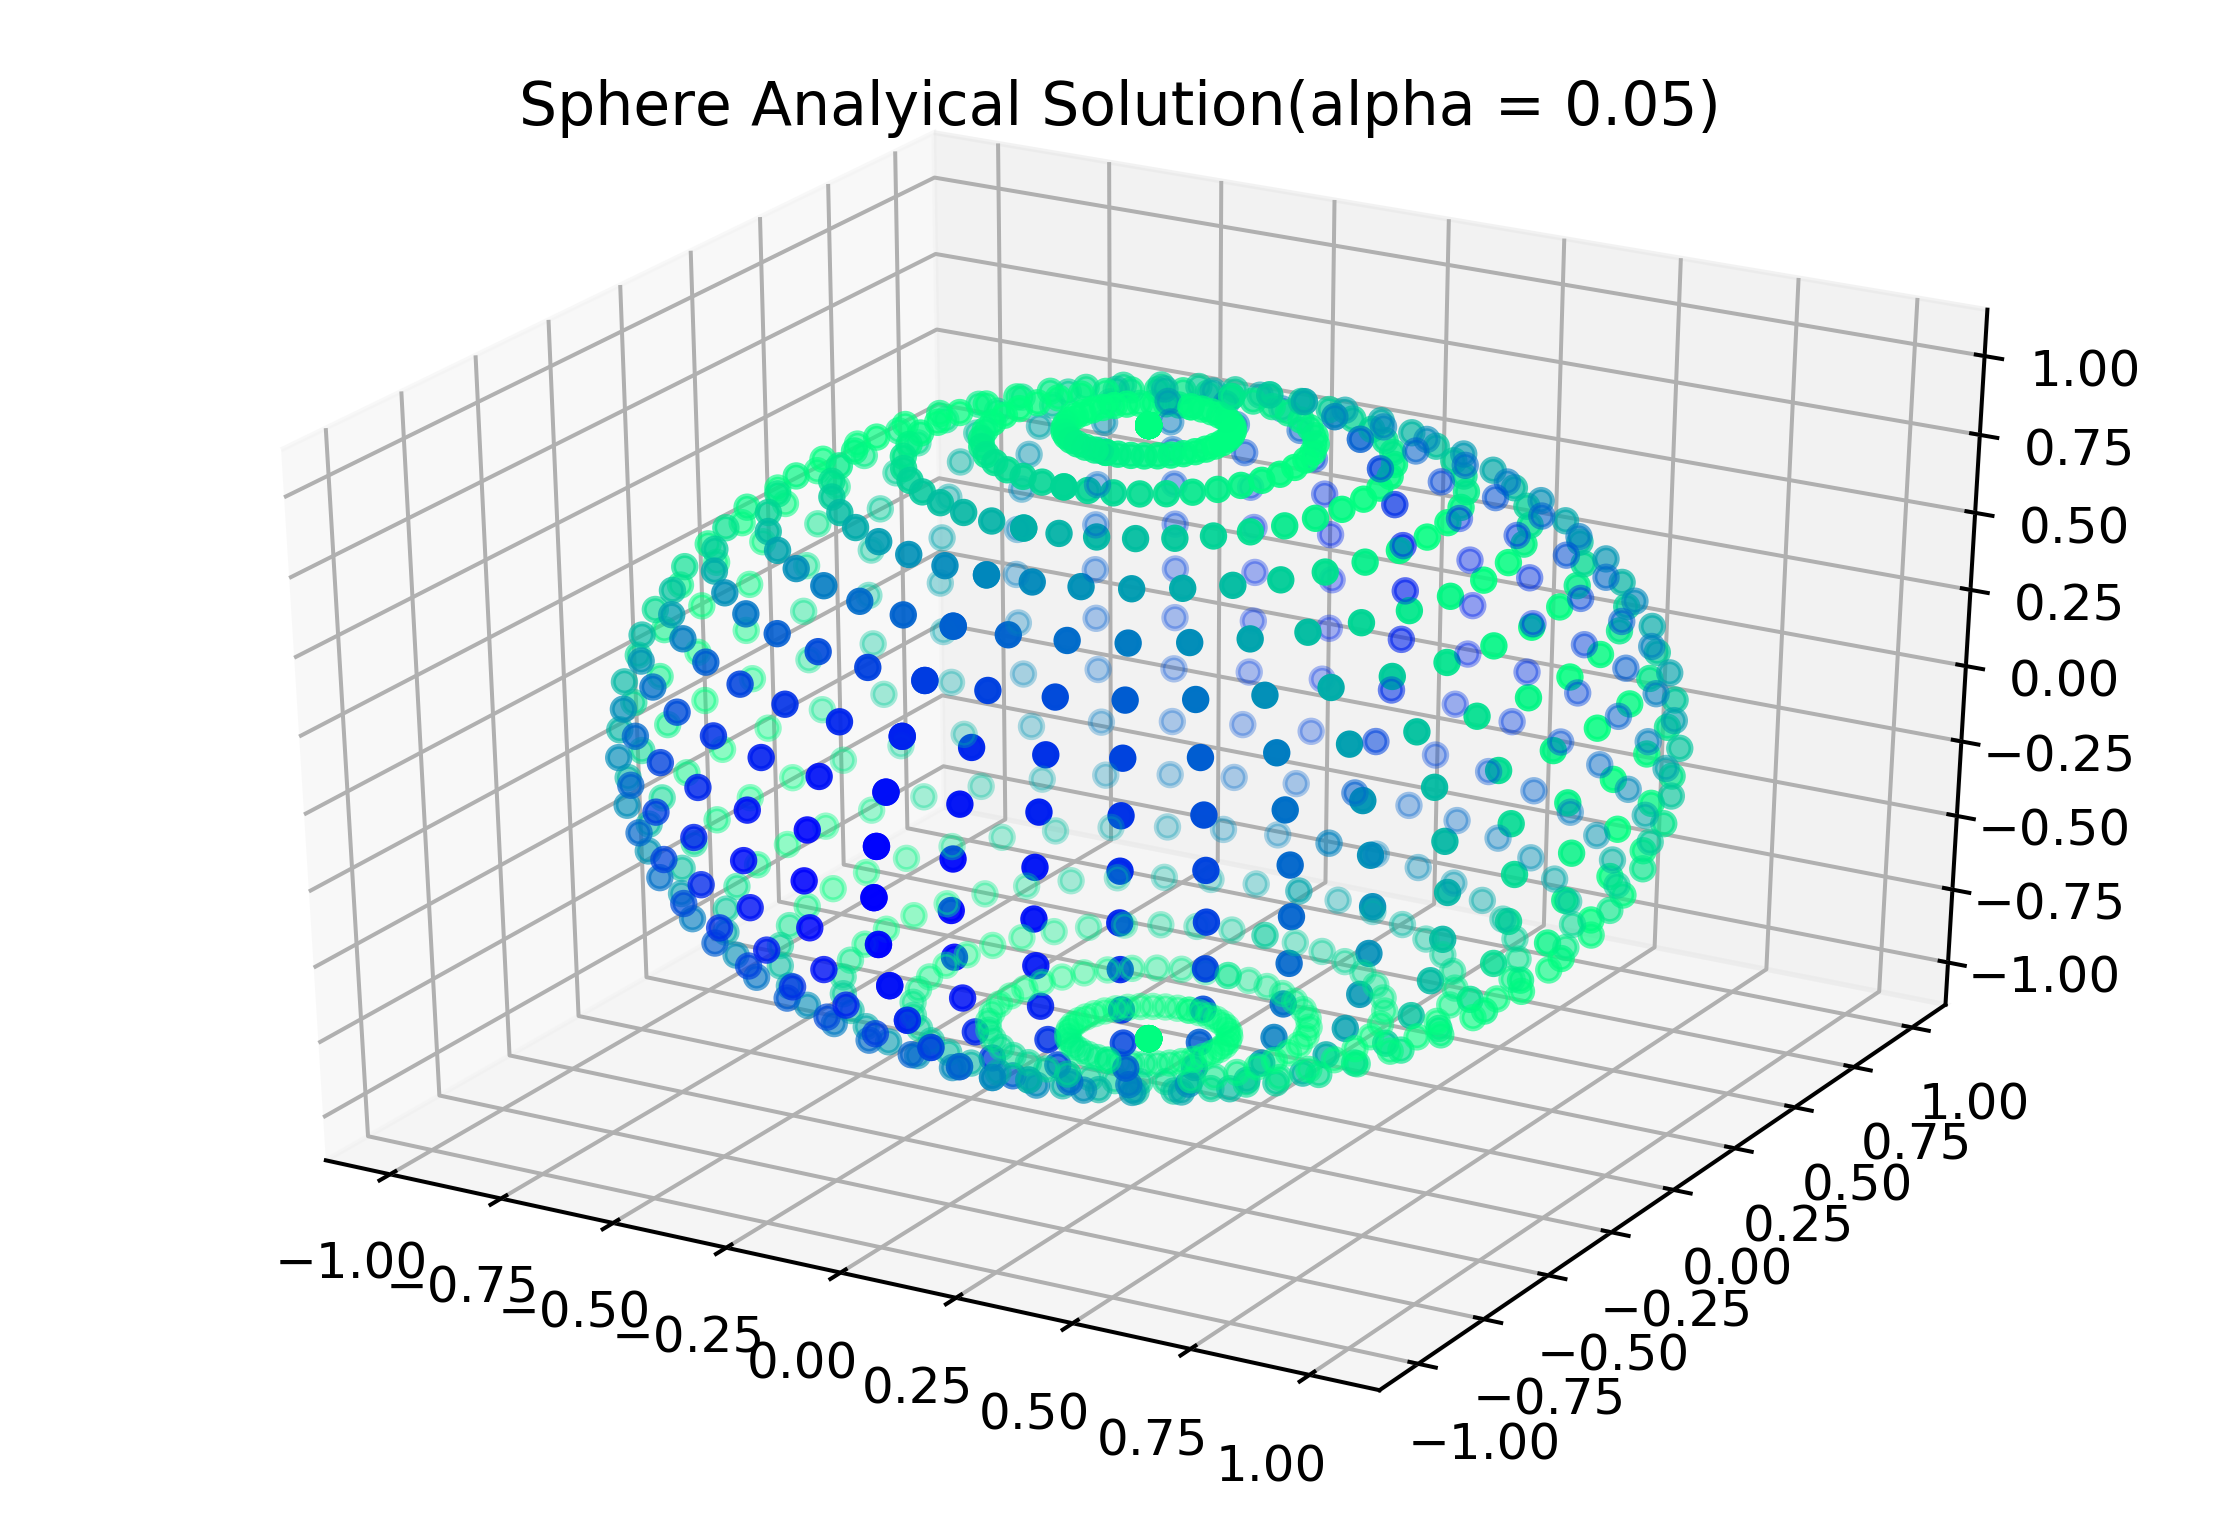

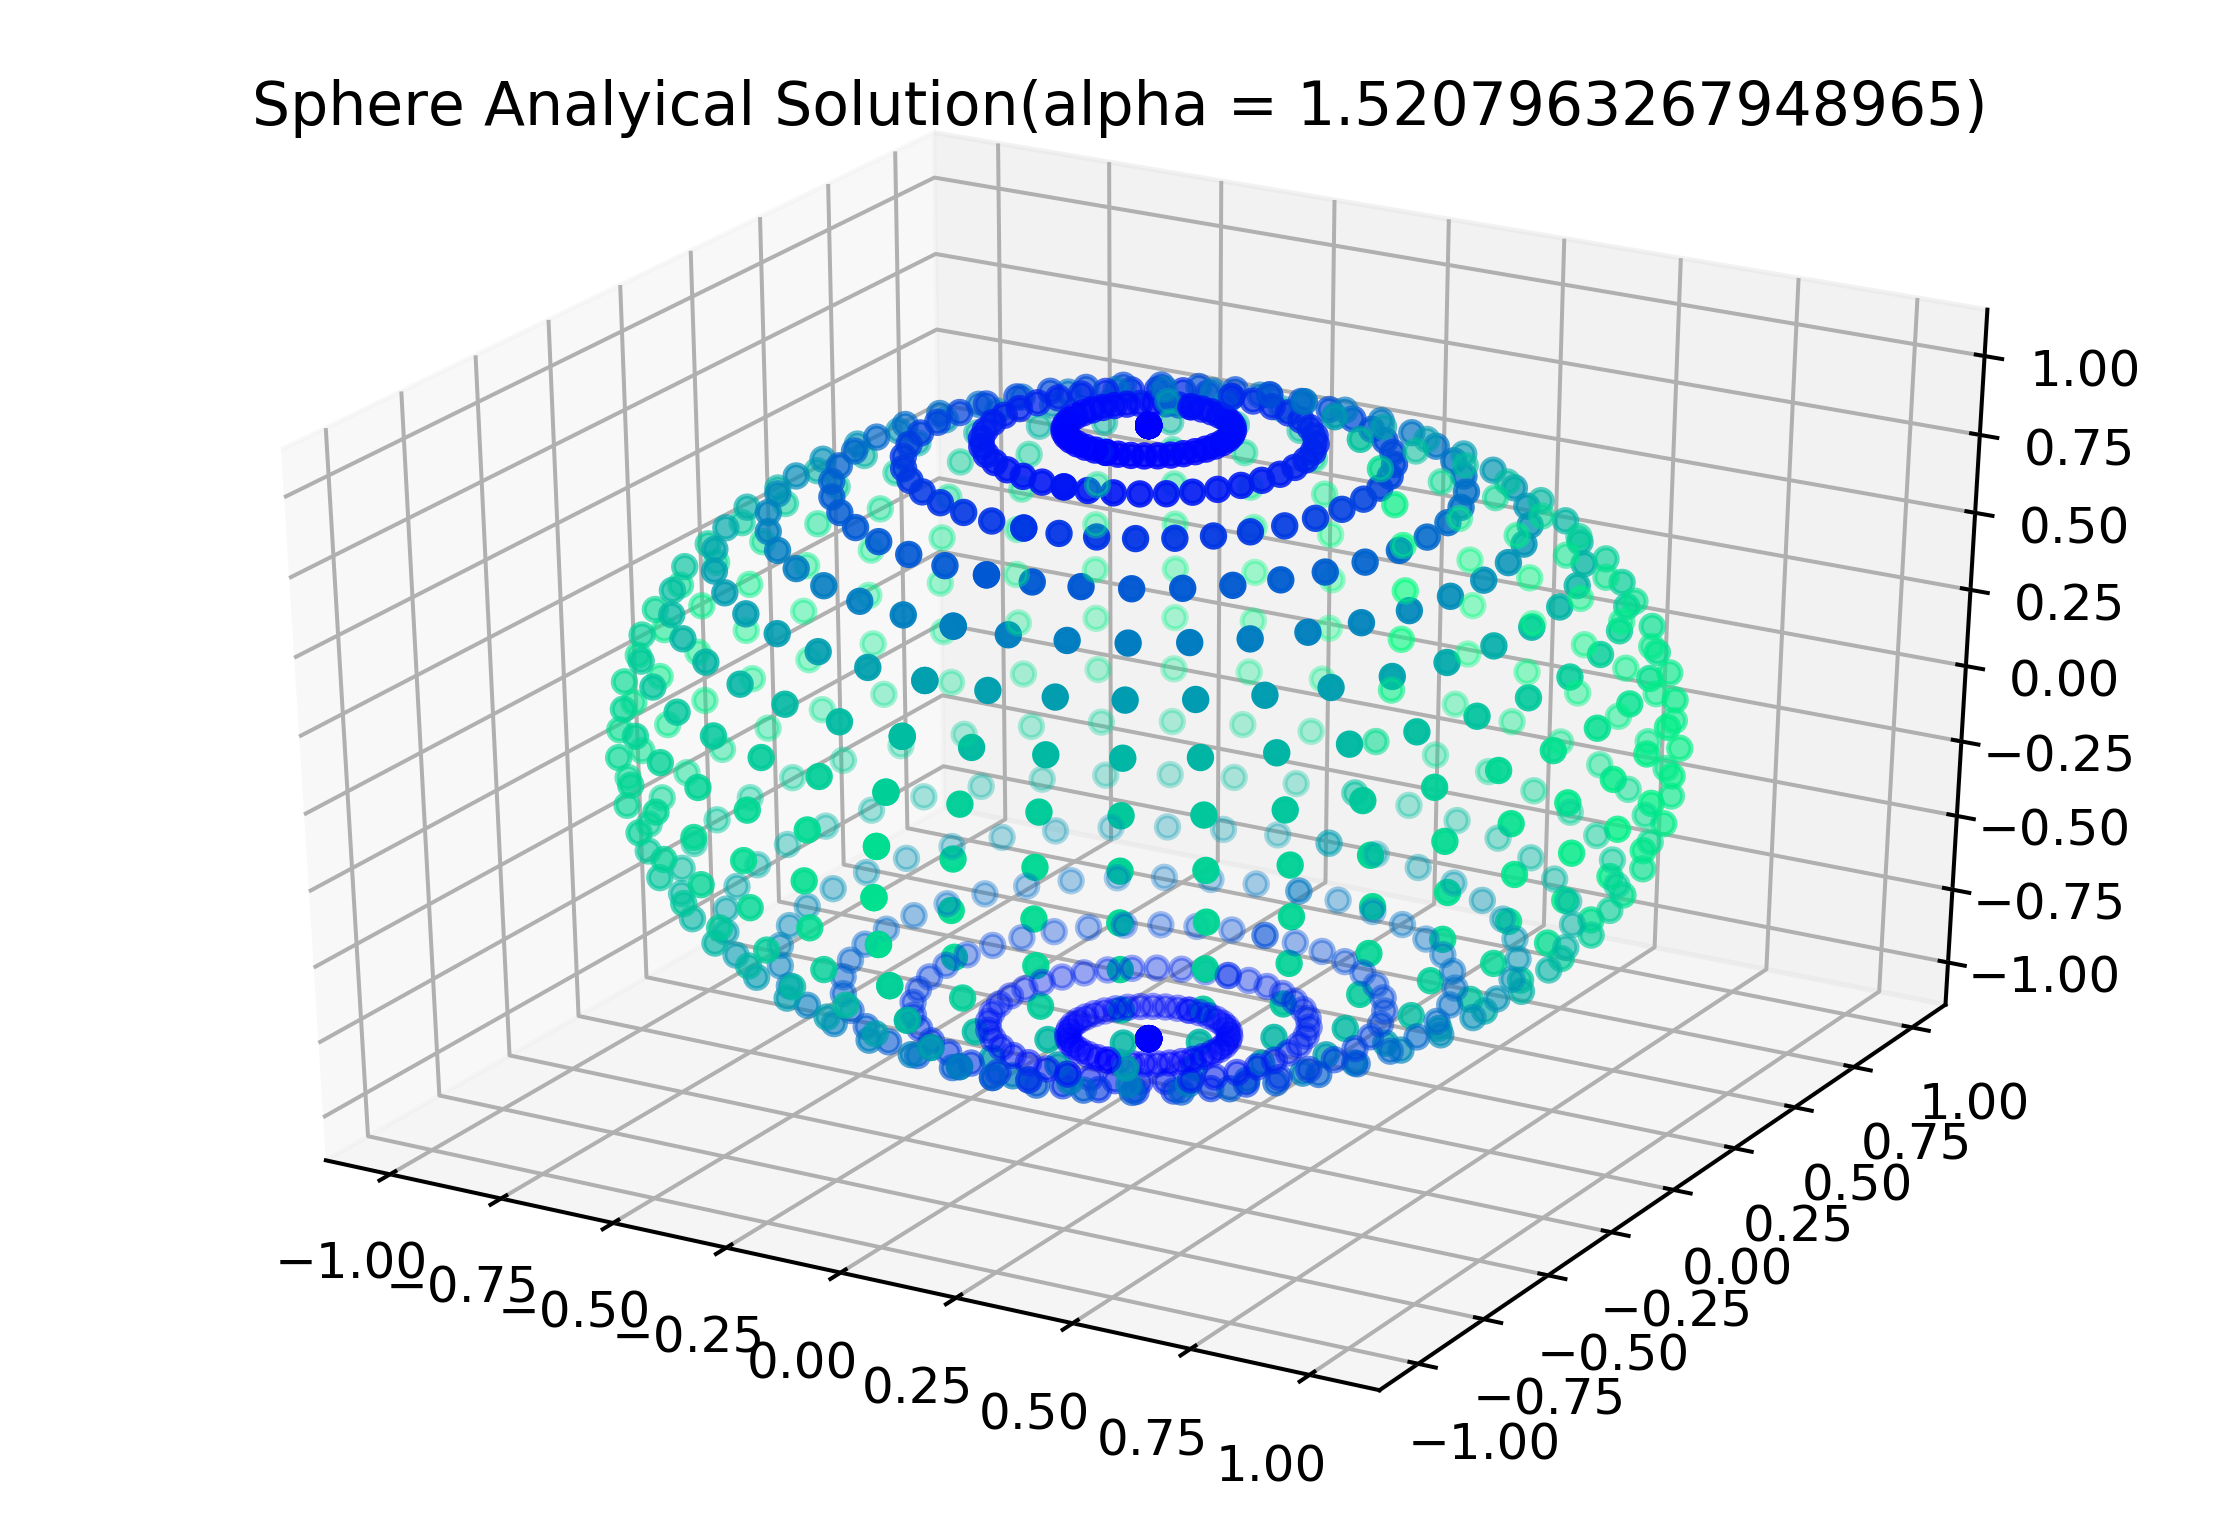

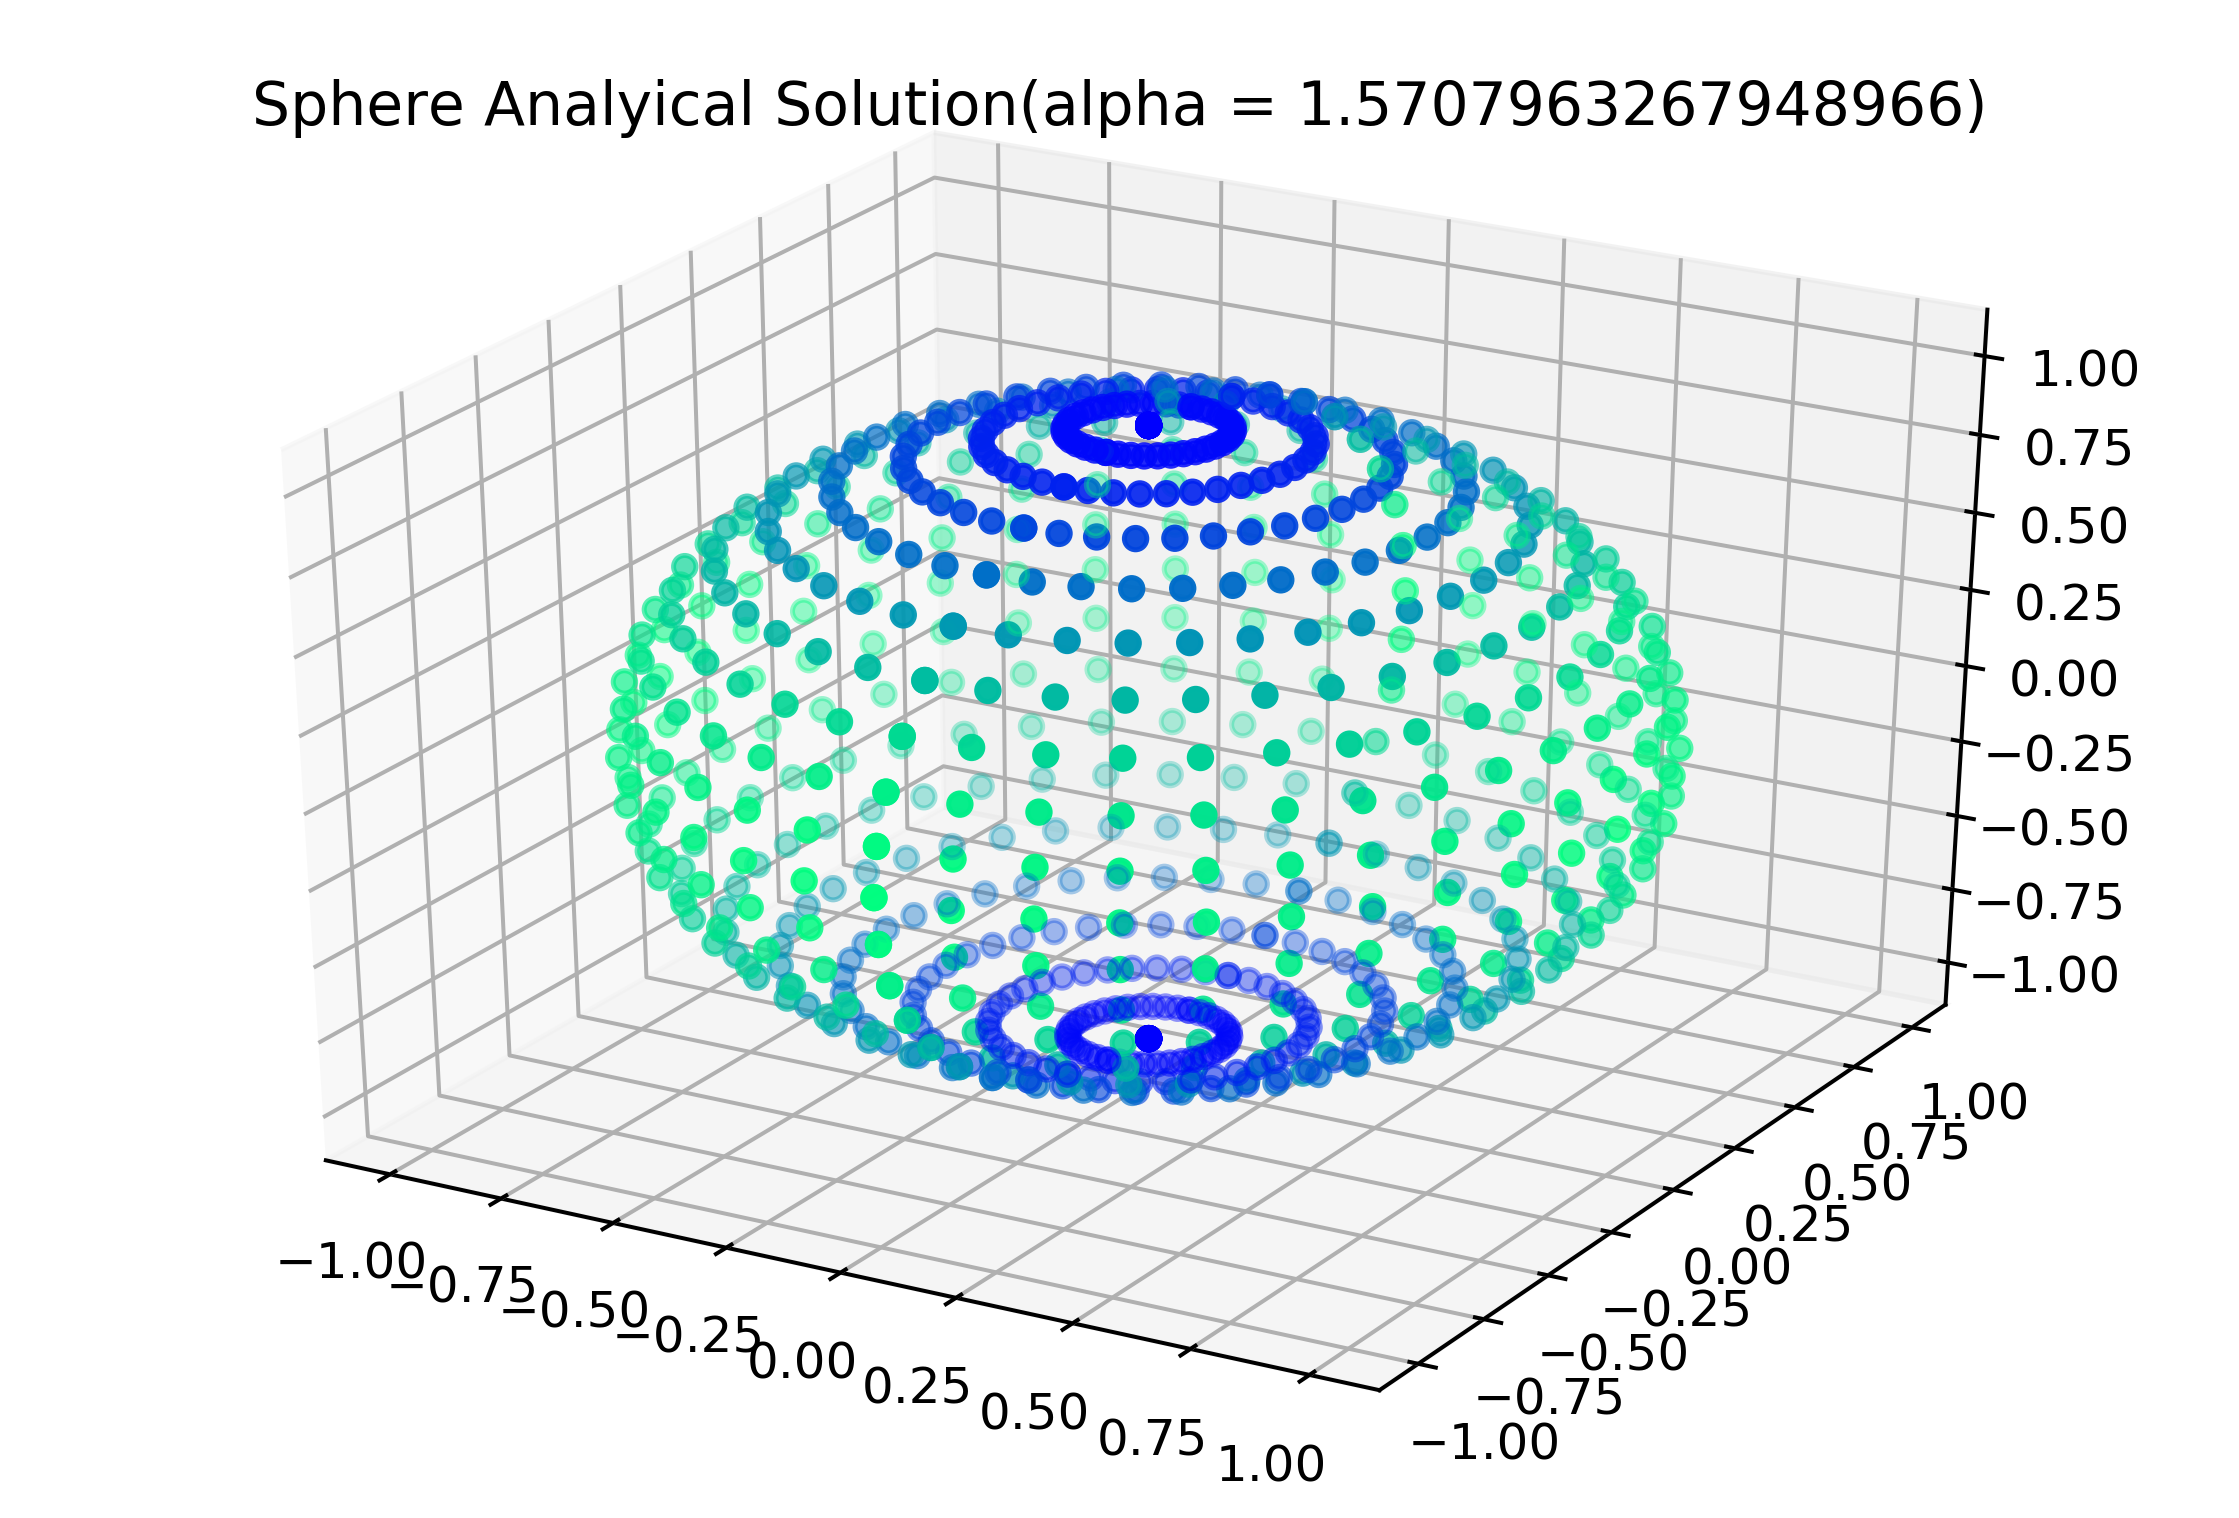

In [12]:
for alp in [0.0, 0.05, math.pi/2 - 0.05, math.pi/2]:
    Sphere(alp)

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.7 Formula </font> </center>

<img src = './Main.jpeg'>

<img src = './Supplementary.jpeg'>

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.-1 Test Damo </font> </center>

In [13]:
import math 
import numpy as np
import scipy as sc
import sympy
import scipy.misc

<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.-1.1 Derivative </font> </center>

In [14]:
'''
This cell is for testing
whether scipy.misc.derivative can work, or not

y(a) = sin(a)
Expect y'(math.pi/3) = cos(math.pi/3) = 1/2
'''
def y(a):
    return math.sin(a)

dy_da = scipy.misc.derivative(y, math.pi/3, dx = 1e-6)
print(dy_da)

0.499999999959


<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.-1.2 &#42;args, &#42;&#42;kwargs and Partial Derivative</font> </center>

In [15]:
a = sympy.symbols('a')
b = sympy.symbols('b')

'''
这里提供一种通过符号运算求数值偏导数の方式,
经尝试, 此处此处 y 并不支持 y = b * math.sin(a).
'''
y = b * a

print(sympy.diff(y, a))
print(sympy.diff(y, a).subs({a : math.pi/3, b : 2}))

b
2


In [16]:
'''
所以, 要另想办法
此处用中文,
有时经常会看到函数の参数中, 有 *args 和 **kwargs,
这两者都是可传进参数, 
区别是是 *args 传进的是 tuple, **kwargs 传进的是 dictionary
*args (argument)
**kwargs (keyword argument)
'''
def f(*args, **kwargs):
    print('Type:', type(args), '  args:', args)
    print('Type:', type(kwargs), ' kwargs:', kwargs)
    print('=' * 60)

f(1, 2)
f(a = 1, b = 2)
f(1, 2, a = 1, b = 2)
f(1, 'c', a = 1, b = 'd')

Type: <class 'tuple'>   args: (1, 2)
Type: <class 'dict'>  kwargs: {}
Type: <class 'tuple'>   args: ()
Type: <class 'dict'>  kwargs: {'a': 1, 'b': 2}
Type: <class 'tuple'>   args: (1, 2)
Type: <class 'dict'>  kwargs: {'a': 1, 'b': 2}
Type: <class 'tuple'>   args: (1, 'c')
Type: <class 'dict'>  kwargs: {'a': 1, 'b': 'd'}


In [17]:
'''
This cell is for testing 
how to get partial derivate

y(a, b) = b * sin(a)
Expect y'(a = math.pi/3, b = 2) = b * cos(a) = 1
'''

def part_deri(func, var = 0, point = list()): 
    args = point[::]
    def wraps(x): 
        args[var] = x         
        return func(*args)   
    return scipy.misc.derivative(wraps, point[var], dx = 1e-6)

def y(a, b):
    return b * math.sin(a)

print(part_deri(y, 0, list((math.pi/3, 2))))

0.999999999918


<center> <font color = #82318E size = 3 face = "微软雅黑" > 3.2.-1.3 Function Nesting </font> </center>

In [18]:
'''
This cell is for testing
function nesting can work, or not

z(a) = sin(a)
y(a, b) = b * z = b * sin(a)
Expect y'(a = math.pi/3, b = 2) = b * cos(a) = 1
'''
def part_deri(func, var = 0, point = list()): 
    args = point[::]
    def wraps(x): 
        args[var] = x         
        return func(*args) 
    return scipy.misc.derivative(wraps, point[var], dx = 1e-6)

def z(a):
    return math.sin(a)
def y(a, b):
    return b * z(a)   

print(part_deri(y, 0, list((math.pi/3, 2))))

0.999999999918
